`ApJdataFrames` Rebull 2016 a & b *Extra analysis*
---
`Titles`:  
a.: Rotation in the Pleiades with K2: I. Data and First Results  
b.: ROTATION IN THE PLEIADES WITH K2. II. MULTIPERIOD STARS    

`Authors`: L. M. Rebull, J. R. Stauffer, J. Bouvier, A. M. Cody, L. A. Hillenbrand, *et al.*

Data is from this paper:  
http://iopscience.iop.org/article/10.3847/0004-6256/152/5/114/meta

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = 150

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import astropy
from astropy.table import Table
from astropy.io import ascii
import numpy as np

In [4]:
df_abc = pd.read_csv('../data/Rebull2016/Rebull_Stauffer_merge.csv')

In [5]:
df_abc.head()

,EPIC,Name_IAU,RAdeg,DEdeg,Other,Vmag,Ksmag_R16,(V-K)0,Per1,Per2,Per3,Per4,Ampl,LC,memb,Per_lit,vsini,Per_cat,dd,ddm,shch,beat,cpeak,resc,resd,dscu,cloud,Name_adopt,Ksmag_S16,(V-K),Mass,Mbol,Radius,Teff,Delmag,E(B-V)
0,210991540.0,033149.84+225024.8,52.95768,22.84023,UGCSJ033149.85+225024.4,NaN,12.75,5.10,0.5749,NaN,NaN,NaN,0.059,LC2,best,0.57,NaN,single,no,no,no,no,no,no,no,no,no,UGCSJ033149.85+225024.4,12.74,5.10,0.37,9.62,0.34,3219.0,-0.64,NaN
1,211016313.0,033207.85+231357.5,53.03274,23.23265,DH017,NaN,12.25,5.05,0.3193,NaN,NaN,NaN,0.056,LC1,best,NaN,NaN,single,no,no,no,no,no,no,no,no,no,DH017,12.24,5.05,0.38,9.12,0.42,3234.0,-0.22,NaN
2,211029135.0,033237.80+232559.3,53.15753,23.43315,UGCSJ033237.82+232559.0,NaN,13.06,5.76,0.2860,NaN,NaN,NaN,0.032,LC4,best,NaN,NaN,single,yes,no,no,no,no,no,no,no,no,UGCSJ033237.82+232559.0,13.05,5.76,0.21,9.97,0.33,3029.0,0.15,NaN
3,211037397.0,033242.30+233400.4,53.17625,23.56679,DH022,NaN,12.54,5.58,0.4990,0.3167,NaN,NaN,0.023,LC1,best,NaN,NaN,multi,no,no,no,no,no,yes,no,no,no,DH022,12.53,5.58,0.23,9.44,0.41,3075.0,0.54,NaN
4,210946764.0,033305.82+220803.2,53.27427,22.13423,PELS004,11.36,9.43,1.82,5.7660,NaN,NaN,NaN,0.011,LC4,best,NaN,NaN,single,no,no,yes,no,no,no,no,no,no,PELS004,9.42,1.82,0.98,5.36,0.87,5355.0,-0.11,NaN


# Import the Fang et al. 2016 data

In [6]:
tab1 = pd.read_fwf('../data/Fang2016/Table_1+4_online.dat', na_values=['-99.00000000', '-9999.0', '99.000, 99.0'])
df = tab1.rename(columns={'#             Object_name':'Object_name'})

In [7]:
df.head()

,Object_name,Vmag,rmag,Icmag,Kmag,T_VI,T_VK,T_rK,T_IK,Period,A_r,R_o,Tspec,RV,EWHa,D_EWHa,TiO2n,D_TiO2n,TiO5n,D_TiO5n,Tquiet,fs1,Tspot1,fs2,Tspot2,multi,Flag,RAJ2000,DEJ2000
0,Cl* Melotte 22 AK III-391,11.308,11.059,10.448,9.388,5537.03,5450.10,5404.59,5386.09,NaN,NaN,NaN,5672.62,6.15,-1.9081,-0.0755,0.9722,-0.0099,0.9400,-0.0151,5672.62,0.326,3515.0,0.300,3595.0,0,1-1-6-0-0,54.004112,24.266083
1,Cl* Melotte 22 PELS 189,12.262,11.883,11.197,9.903,5015.07,4984.99,4986.26,4960.15,7.410650,0.0159,0.38243,5072.62,3.26,-0.9870,0.1472,0.9820,0.0025,0.9430,-0.0071,5015.07,0.000,NaN,0.109,3595.0,0,1-1-1-0-0,54.126263,24.012226
2,Cl* Melotte 22 AK II-359,10.579,10.458,9.840,9.021,5942.01,5940.74,5790.09,5939.64,NaN,NaN,NaN,6096.49,-0.55,-2.1853,0.0696,0.9838,-0.0010,0.9571,-0.0014,6096.49,0.057,3545.0,0.048,3615.0,0,1-1-6-0-0,54.395443,24.236599
3,Cl* Melotte 22 PELS 015,10.065,10.095,9.420,8.696,6231.92,6225.49,5858.16,6219.78,2.295334,0.0263,0.19851,6046.38,9.11,-2.1156,0.2509,0.9857,0.0002,0.9508,-0.0084,6231.92,0.000,NaN,0.242,3605.0,0,1-1-1-0-0,54.594090,22.499697
4,Cl* Melotte 22 PELS 020,10.510,10.337,9.794,9.041,6013.46,6069.36,6049.97,6127.06,2.986199,0.0087,0.23344,5942.67,4.15,-2.0060,0.1746,0.9845,0.0003,0.9535,-0.0043,6013.46,0.000,NaN,0.125,3610.0,0,1-1-1-0-0,54.736942,24.569799


In [8]:
df.Object_name.values[0:30]

array(['Cl* Melotte 22 AK III-391', 'Cl* Melotte 22 PELS 189',
       'Cl* Melotte 22 AK II-359', 'Cl* Melotte 22 PELS 015',
       'Cl* Melotte 22 PELS 020', 'Cl* Melotte 22 PELS 128',
       'Cl* Melotte 22 PELS 138', 'Cl* Melotte 22 PELS 012',
       'Cl* Melotte 22 AK III-700', 'Cl* Melotte 22 HCG 39',
       'Cl* Melotte 22 DH 166', 'Cl* Melotte 22 DH 176',
       'Cl* Melotte 22 HCG 65', 'Cl* Melotte 22 PELS 028',
       'Cl* Melotte 22 SK687', 'Cl* Melotte 22 SK671',
       'Cl* Melotte 22 HCG 85', 'Cl* Melotte 22 PELS 030',
       'Cl* Melotte 22 DH 249', 'Cl* Melotte 22 DH 257',
       'Cl* Melotte 22 PELS 031', 'Cl Melotte 22 97', 'Cl Melotte 22 174',
       'Cl Melotte 22 173', 'Cl Melotte 22 248', 'Cl Melotte 22 253',
       'Cl Melotte 22 250', 'Cl* Melotte 22 PELS 059', 'Cl Melotte 22 296',
       'Cl Melotte 22 293'], dtype=object)

Ugh, the naming convention is non-standard in a way that is likely more work than it's worth to try to match to other catalogs.  Whyyyyyyyyy.

### Try full-blown coordinate matching

From astropy: http://docs.astropy.org/en/stable/coordinates/matchsep.html

In [9]:
ra1 = df.RAJ2000
dec1 = df.DEJ2000

ra2 = df_abc.RAdeg
dec2 = df_abc.DEdeg

In [10]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)  
catalog = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)  
idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

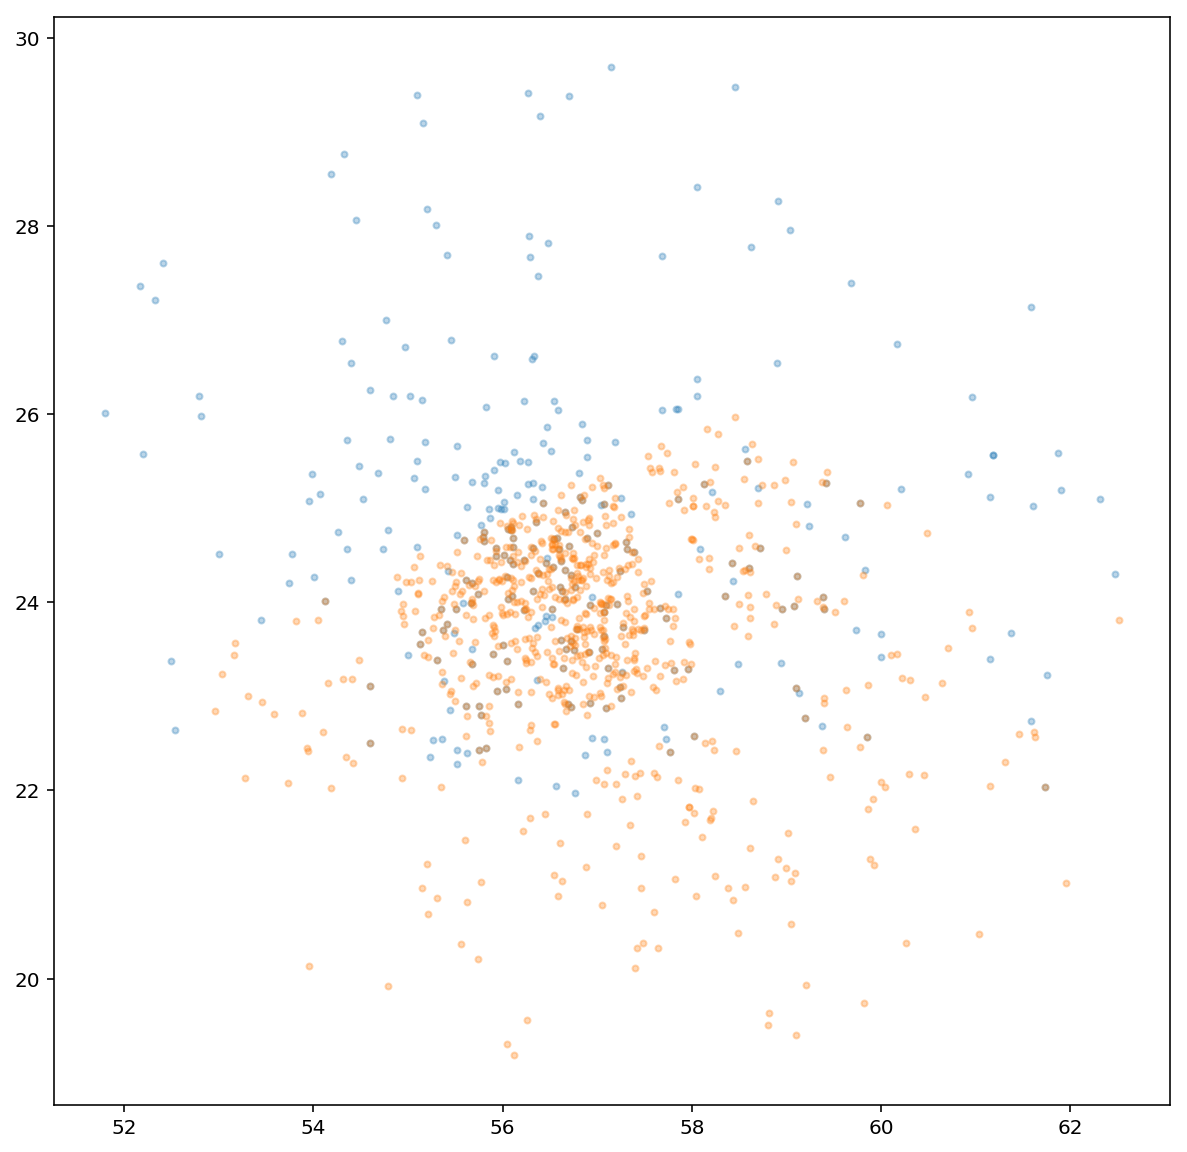

In [11]:
plt.figure(figsize=(10,10))
plt.plot(ra1, dec1, '.', alpha=0.3)
plt.plot(ra2, dec2, '.', alpha=0.3)

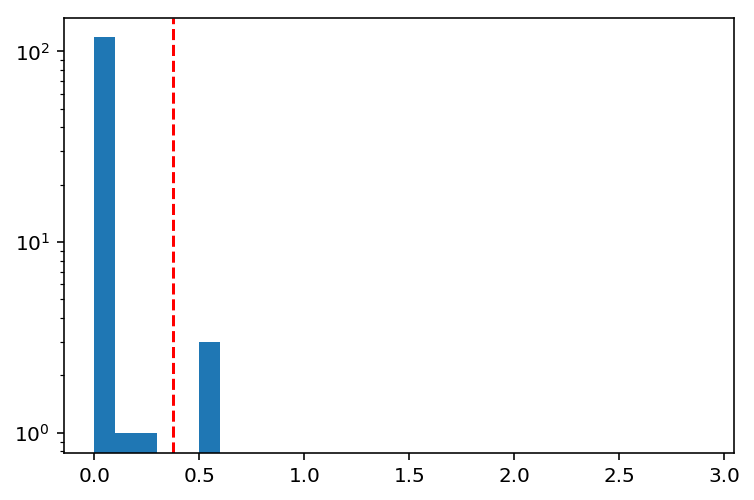

In [12]:
plt.hist(d2d.to(u.arcsecond)/u.arcsecond, bins=np.arange(0,3, 0.1));
plt.yscale('log')
plt.axvline(x=0.375,color='r', linestyle='dashed')

Ok, we'll accept all matches with better than 0.375 arcsecond separation.

In [13]:
boolean_matches = d2d.to(u.arcsecond).value < 0.375

How many matches are there?

In [14]:
boolean_matches.sum()

120

120 matches--- not bad. Only keep the subset of fang sources that also have K2

In [15]:
df['EPIC'] = ''

In [16]:
matched_idx = idx[boolean_matches]

In [17]:
matched_idx

array([ 16,  24,  44,  55,  63,  99, 111, 112, 124, 156, 158, 165, 169,
       174, 178, 180, 185, 208, 257, 300, 310, 311, 315, 321, 325, 328,
       330, 336, 342, 344, 348, 360, 370, 407, 413, 420, 422, 436, 447,
       457, 458, 462, 478, 502, 511, 519, 568, 587, 591, 651, 666, 680,
       712, 727, 706, 670,  43,  58,  67,  78,  86,  90,  89, 100, 115,
       120, 121, 136, 142, 146, 160, 163, 171, 184, 187, 198, 209, 233,
       239, 246, 261, 272, 279, 291, 306, 316, 343, 364, 378, 385, 468,
       470, 475, 505, 506, 509, 513, 522, 543, 564, 601, 607, 626, 633,
       690, 699, 703, 704, 716, 723,  25,  96, 108, 118, 145, 235, 285,
       338, 654, 715])

In [18]:
df.shape, df_abc.shape

((304, 30), (759, 36))

In [19]:
idx.shape

(304,)

In [20]:
df['EPIC'][boolean_matches] = df_abc['EPIC'].iloc[matched_idx].values

/Users/obsidian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
fang_K2 = pd.merge(df_abc, df, how='left', on='EPIC')

In [22]:
fang_K2.columns

Index(['EPIC', 'Name_IAU', 'RAdeg', 'DEdeg', 'Other', 'Vmag_x', 'Ksmag_R16',
       '(V-K)0', 'Per1', 'Per2', 'Per3', 'Per4', 'Ampl', 'LC', 'memb',
       'Per_lit', 'vsini', 'Per_cat', 'dd', 'ddm', 'shch', 'beat', 'cpeak',
       'resc', 'resd', 'dscu', 'cloud', 'Name_adopt', 'Ksmag_S16', '(V-K)',
       'Mass', 'Mbol', 'Radius', 'Teff', 'Delmag', 'E(B-V)', 'Object_name',
       'Vmag_y', 'rmag', 'Icmag', 'Kmag', 'T_VI', 'T_VK', 'T_rK', 'T_IK',
       'Period', 'A_r', 'R_o', 'Tspec', 'RV', 'EWHa', 'D_EWHa', 'TiO2n',
       'D_TiO2n', 'TiO5n', 'D_TiO5n', 'Tquiet', 'fs1', 'Tspot1', 'fs2',
       'Tspot2', 'multi', 'Flag', 'RAJ2000', 'DEJ2000'],
      dtype='object')

In [23]:
fang_K2[['Name_adopt', 'Object_name']][fang_K2.Object_name.notnull()].tail(10)

,Name_adopt,Object_name
690,HCG502,Cl* Melotte 22 HCG 502
699,SK22,Cl* Melotte 22 SK22
703,SK17,Cl* Melotte 22 SK17
704,SK18,Cl* Melotte 22 SK18
706,s5061696,J035647.81+224608.0
712,PELS162,Cl* Melotte 22 PELS 162
715,HHJ439,Cl* Melotte 22 HHJ 439
716,DH856,Cl* Melotte 22 DH 856
723,HHJ366,Cl* Melotte 22 HHJ 366
727,DH875,Cl* Melotte 22 DH 875


In [26]:
fang_K2.to_csv('../data/Fang2016/Rebull_Fang_merge.csv', index=False)

In [27]:
fang_K2

,EPIC,Name_IAU,RAdeg,DEdeg,Other,Vmag_x,Ksmag_R16,(V-K)0,Per1,Per2,Per3,Per4,Ampl,LC,memb,Per_lit,vsini,Per_cat,dd,ddm,shch,beat,cpeak,resc,resd,dscu,cloud,Name_adopt,Ksmag_S16,(V-K),Mass,Mbol,Radius,Teff,Delmag,E(B-V),Object_name,Vmag_y,rmag,Icmag,Kmag,T_VI,T_VK,T_rK,T_IK,Period,A_r,R_o,Tspec,RV,EWHa,D_EWHa,TiO2n,D_TiO2n,TiO5n,D_TiO5n,Tquiet,fs1,Tspot1,fs2,Tspot2,multi,Flag,RAJ2000,DEJ2000
0,2.10992e+08,033149.84+225024.8,52.95768,22.84023,UGCSJ033149.85+225024.4,NaN,12.75,5.10,0.5749,NaN,NaN,NaN,0.059,LC2,best,0.57,NaN,single,no,no,no,no,no,no,no,no,no,UGCSJ033149.85+225024.4,12.74,5.10,0.37,9.62,0.34,3219.0,-0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.11016e+08,033207.85+231357.5,53.03274,23.23265,DH017,NaN,12.25,5.05,0.3193,NaN,NaN,NaN,0.056,LC1,best,NaN,NaN,single,no,no,no,no,no,no,no,no,no,DH017,12.24,5.05,0.38,9.12,0.42,3234.0,-0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.11029e+08,033237.80+232559.3,53.15753,23.43315,UGCSJ033237.82+232559.0,NaN,13.06,5.76,0.2860,NaN,NaN,NaN,0.032,LC4,best,NaN,NaN,single,yes,no,no,no,no,no,no,no,no,UGCSJ033237.82+232559.0,13.05,5.76,0.21,9.97,0.33,3029.0,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.11037e+08,033242.30+233400.4,53.17625,23.56679,DH022,NaN,12.54,5.58,0.4990,0.3167,NaN,NaN,0.023,LC1,best,NaN,NaN,multi,no,no,no,no,no,yes,no,no,no,DH022,12.53,5.58,0.23,9.44,0.41,3075.0,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.10947e+08,033305.82+220803.2,53.27427,22.13423,PELS004,11.36,9.43,1.82,5.7660,NaN,NaN,NaN,0.011,LC4,best,NaN,NaN,single,no,no,yes,no,no,no,no,no,no,PELS004,9.42,1.82,0.98,5.36,0.87,5355.0,-0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.11002e+08,033313.90+230023.2,53.30793,23.00647,PELS123,11.98,9.67,2.20,7.6495,6.9112,NaN,NaN,0.028,LC3,best,7.07,NaN,multi,no,no,no,yes,yes,yes,no,no,no,PELS123,9.66,2.20,0.88,5.84,0.81,4963.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.10998e+08,033349.79+225620.0,53.45748,22.93891,DH031,NaN,13.29,5.21,0.3744,NaN,NaN,NaN,0.037,LC2,ok,NaN,NaN,single,no,no,no,no,no,no,no,no,no,DH031,13.28,5.21,0.34,10.16,0.27,3184.0,-0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.1099e+08,033419.35+224842.4,53.58063,22.81180,DH034,NaN,13.93,6.39,0.7130,NaN,NaN,NaN,0.033,LC1,best,NaN,NaN,single,no,no,no,no,no,no,no,no,no,DH034,13.92,6.39,0.14,10.90,0.23,2898.0,-0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.10943e+08,033454.93+220446.6,53.72890,22.07963,DH040,16.17,11.57,4.49,0.8275,NaN,NaN,NaN,0.021,LC2,best,0.83,NaN,single,yes,no,no,no,no,no,no,no,no,DH040,11.56,4.49,0.50,8.39,0.52,3445.0,-0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.11052e+08,033516.25+234758.1,53.81775,23.79950,DH044,NaN,13.19,5.81,0.4725,NaN,NaN,NaN,0.038,LC1,best,NaN,NaN,single,no,no,no,no,no,no,no,no,no,DH044,13.18,5.81,0.20,10.10,0.31,3016.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Great correspondence!  Looks like there are 120 targets in both categories.

Let's spot-check if they use similar temperatures:

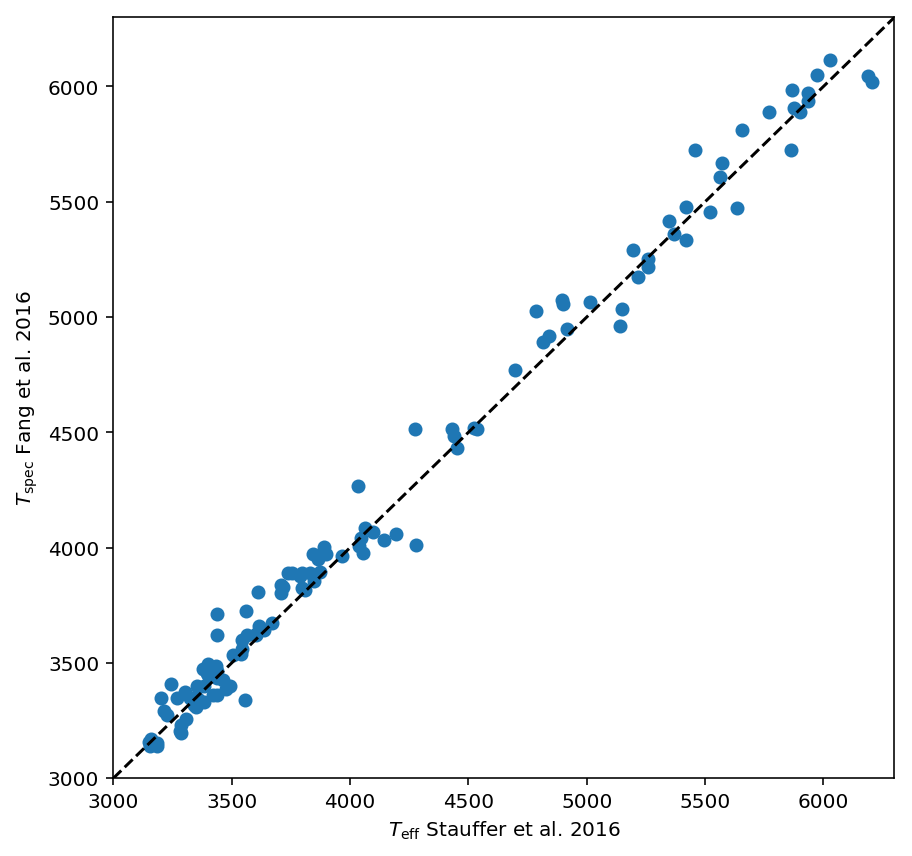

In [24]:
plt.figure(figsize=(7, 7))
plt.plot(fang_K2.Teff, fang_K2.Tspec, 'o')
plt.xlabel(r'$T_{\mathrm{eff}}$ Stauffer et al. 2016')
plt.ylabel(r'$T_{\mathrm{spec}}$ Fang et al. 2016')
plt.plot([3000, 6300], [3000, 6300], 'k--')
plt.ylim(3000, 6300)
plt.xlim(3000, 6300);

What's the scatter?


In [25]:
delta_Tspec = fang_K2.Teff - fang_K2.Tspec
delta_Tspec = delta_Tspec.dropna()
RMS_Tspec = np.sqrt((delta_Tspec**2.0).sum()/len(delta_Tspec))
print('{:0.0f}'.format(RMS_Tspec))

101


The authors disagree on temperature by about $\delta T \sim$ 100 K RMS.

Let's make the figure we really want to make:  K2 Amplitude versus spectroscopically measured filling factor of starspots $f_{spot}$.  We expect that the plot will be a little noisy due to differences in temperature assumptions and such, but it is absolutely fundamental.  

First we need to convert the amplitude in magnitudes to a faction $\in [0,1]$.  The $\Delta V$ in Stauffer et al. 2016 has negative values, so I'm not sure what it is!  The `Ampl` from Rebull et al. 2016 is: 
> Amplitude, in mag, of the 10th to the 90th percentile

In [59]:
fang_K2['flux_amp'] = 1.0 - 10**(fang_K2.Ampl/-2.5)

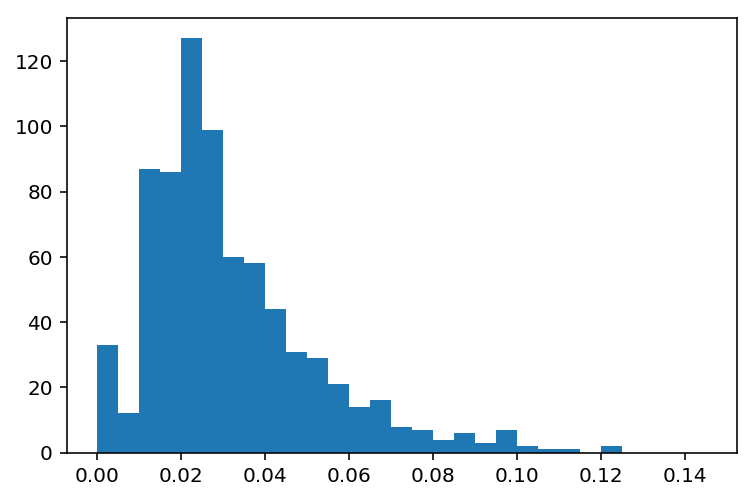

In [60]:
plt.hist(fang_K2.flux_amp, bins=np.arange(0, 0.15, 0.005));

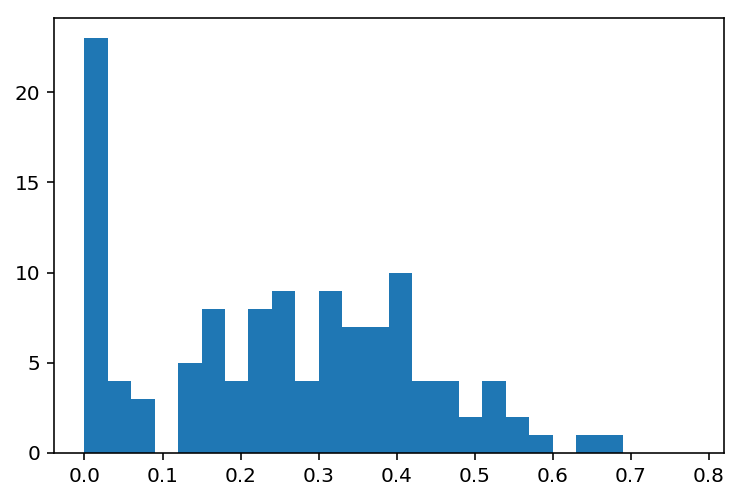

In [61]:
plt.hist(fang_K2.fs1.dropna(), bins=np.arange(0, 0.8, 0.03));

In [62]:
sns.set_context('talk')

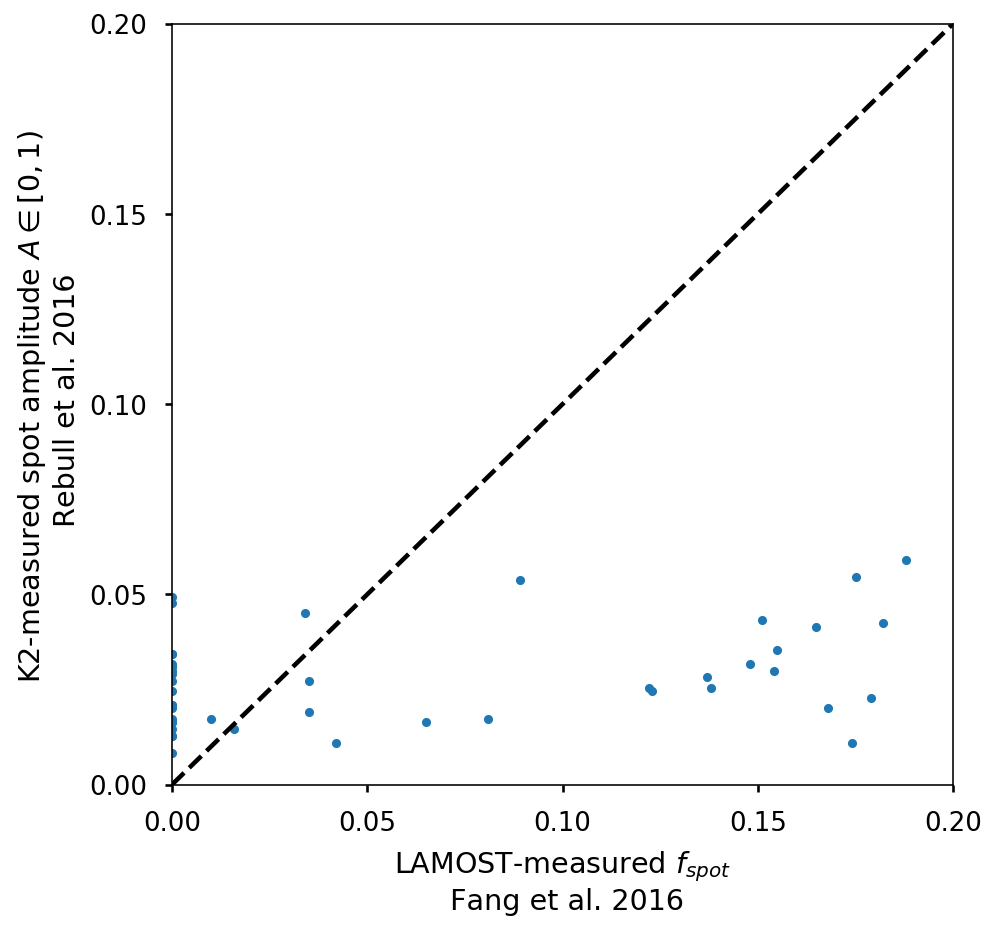

In [63]:
plt.figure(figsize=(7, 7))
plt.plot(fang_K2.fs1, fang_K2.flux_amp, '.')
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,0.2)
plt.ylim(0,0.2)
plt.xlabel('LAMOST-measured $f_{spot}$ \n Fang et al. 2016')
plt.ylabel('K2-measured spot amplitude $A \in [0,1)$ \n Rebull et al. 2016')
plt.xticks(np.arange(0, 0.21, 0.05))
plt.yticks(np.arange(0, 0.21, 0.05))
plt.savefig('K2_LAMOST_starspots_data.png', bbox_inches='tight', dpi=300);

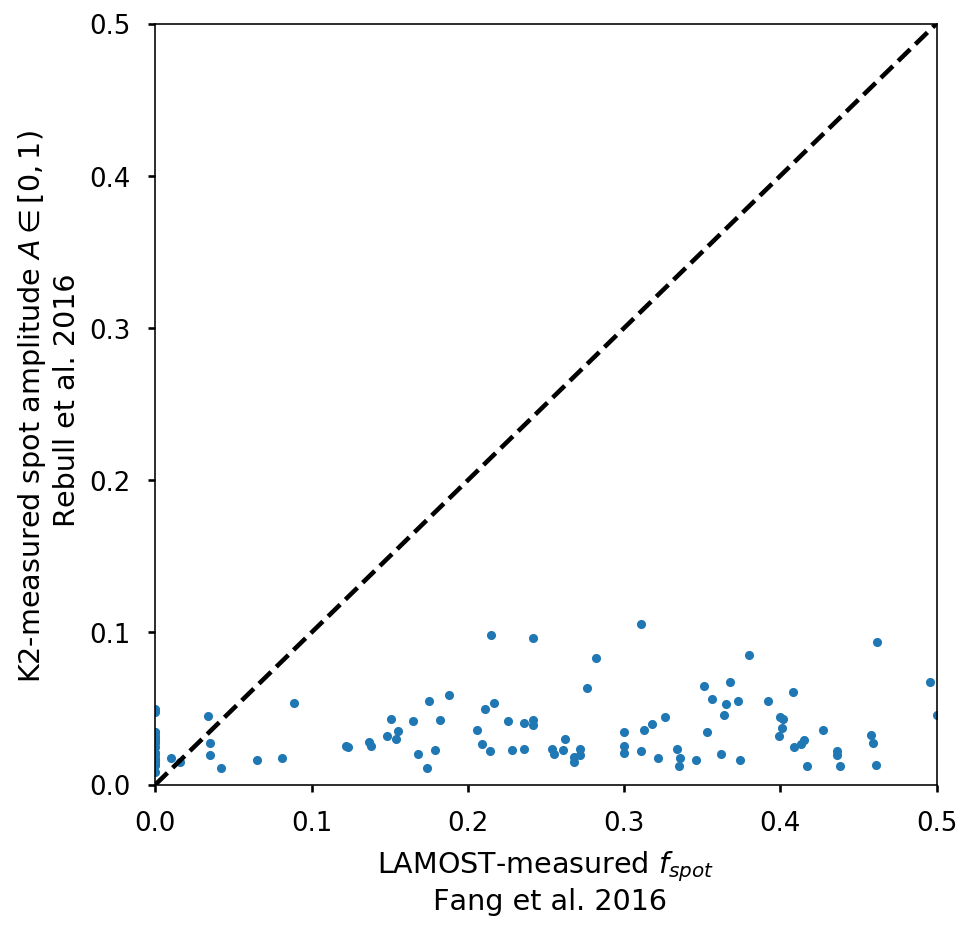

In [64]:
plt.figure(figsize=(7, 7))
plt.plot(fang_K2.fs1, fang_K2.flux_amp, '.')
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,0.5)
plt.ylim(0,0.5)
plt.xlabel('LAMOST-measured $f_{spot}$ \n Fang et al. 2016')
plt.ylabel('K2-measured spot amplitude $A \in [0,1)$ \n Rebull et al. 2016')
plt.xticks(np.arange(0, 0.51, 0.1))
plt.yticks(np.arange(0, 0.51, 0.1))
plt.savefig('K2_LAMOST_starspots_wide.png', bbox_inches='tight', dpi=300);

Awesome!  The location of points indicate that starspots have a large longitudinally-symmetric component that evades detection in K2 amplitudes.

What effects can cause / mimic this behavior?
- Unresolved binarity could cause an errant TiO measurement, biasing the Fang *et al.* measurement.
- Increased rotation (Rossby number) could make stronger or weaker dipolar magnetic fields
- EW H$\alpha$ could be correlated, from an activity sense.
- 


In [65]:
fang_K2.columns

Index(['EPIC', 'Name_IAU', 'RAdeg', 'DEdeg', 'Other', 'Vmag_x', 'Ksmag_R16',
       '(V-K)0', 'Per1', 'Per2', 'Per3', 'Per4', 'Ampl', 'LC', 'memb',
       'Per_lit', 'vsini', 'Per_cat', 'dd', 'ddm', 'shch', 'beat', 'cpeak',
       'resc', 'resd', 'dscu', 'cloud', 'Name_adopt', 'Ksmag_S16', '(V-K)',
       'Mass', 'Mbol', 'Radius', 'Teff', 'Delmag', 'E(B-V)', 'Object_name',
       'Vmag_y', 'rmag', 'Icmag', 'Kmag', 'T_VI', 'T_VK', 'T_rK', 'T_IK',
       'Period', 'A_r', 'R_o', 'Tspec', 'RV', 'EWHa', 'D_EWHa', 'TiO2n',
       'D_TiO2n', 'TiO5n', 'D_TiO5n', 'Tquiet', 'fs1', 'Tspot1', 'fs2',
       'Tspot2', 'multi', 'Flag', 'RAJ2000', 'DEJ2000', 'flux_amp'],
      dtype='object')

In [66]:
fang_K2.beat.value_counts()

no     624
yes    135
Name: beat, dtype: int64

### Crosstabs with discreate variables: Legend

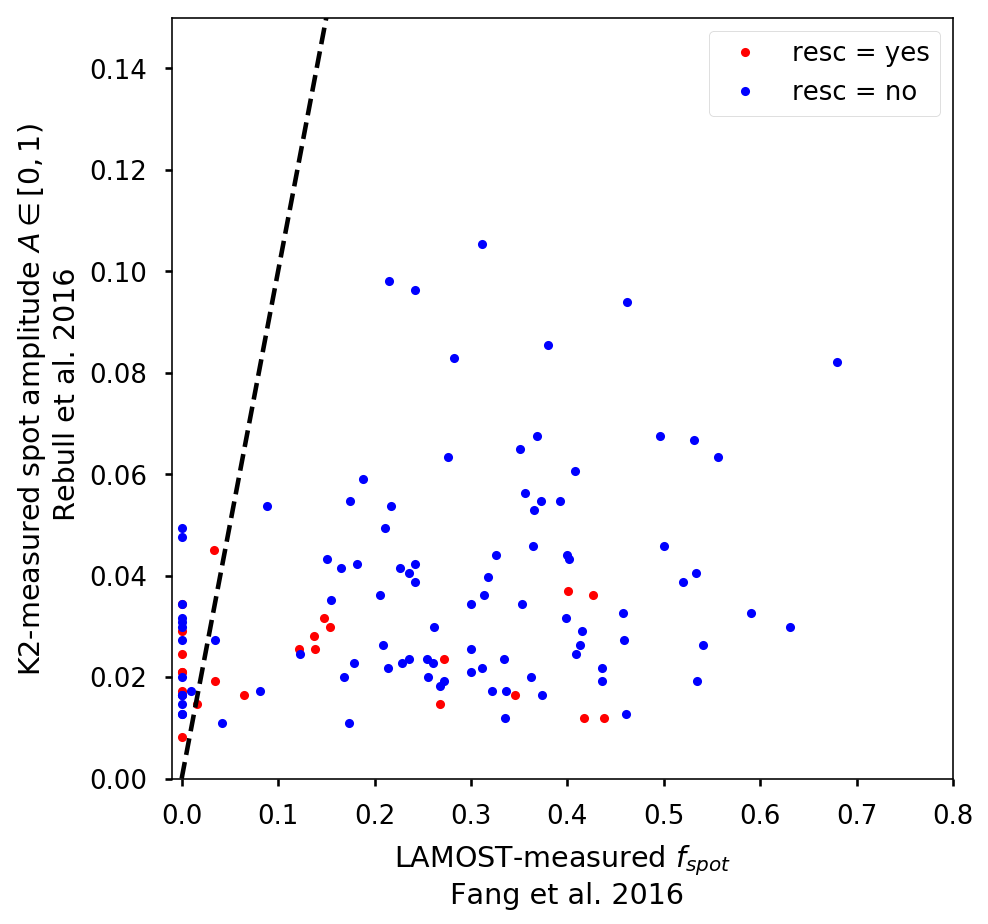

In [67]:
plt.figure(figsize=(7, 7))
cross_tab = 'resc'
c1 = fang_K2[cross_tab] == 'yes'
c2 = fang_K2[cross_tab] == 'no'
plt.plot(fang_K2.fs1[c1], fang_K2.flux_amp[c1], 'r.', label='{} = yes'.format(cross_tab))
plt.plot(fang_K2.fs1[c2], fang_K2.flux_amp[c2], 'b.', label='{} = no'.format(cross_tab))

plt.legend(loc='best')

plt.plot([0,1], [0,1], 'k--')
plt.xlim(-0.01,0.8)
plt.ylim(0,0.15)
plt.xlabel('LAMOST-measured $f_{spot}$ \n Fang et al. 2016')
plt.ylabel('K2-measured spot amplitude $A \in [0,1)$ \n Rebull et al. 2016')
#plt.xticks(np.arange(0, 0.51, 0.1))
#plt.yticks(np.arange(0, 0.51, 0.1))
plt.savefig('K2_LAMOST_starspots_crosstab.png', bbox_inches='tight', dpi=300);

### Crosstabs with continuous variables: Colorbar

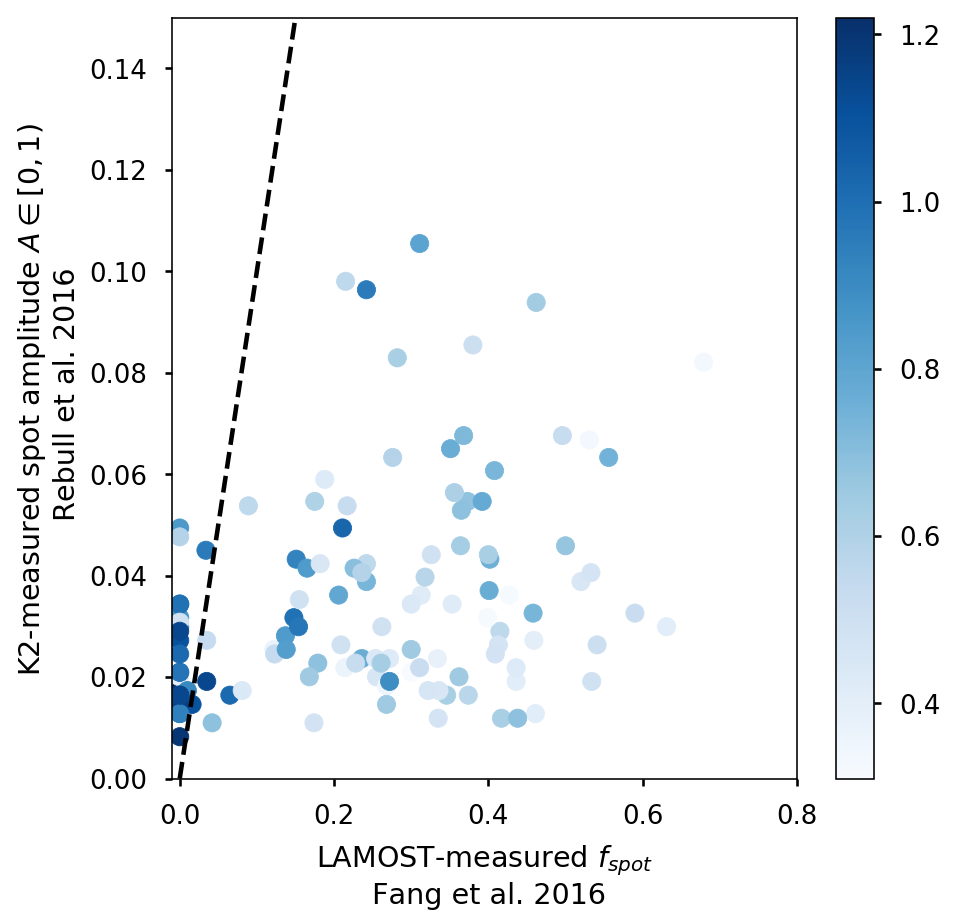

In [68]:
plt.figure(figsize=(7, 7))
cross_tab = 'Mass'
cm = plt.cm.get_cmap('Blues')
sc = plt.scatter(fang_K2.fs1, fang_K2.flux_amp, c=fang_K2[cross_tab], cmap=cm)
cb = plt.colorbar(sc)
#cb.set_label(r'$T_{spot}$ (K)')

plt.plot([0,1], [0,1], 'k--')
plt.xlim(-0.01,0.8)
plt.ylim(0,0.15)
plt.xlabel('LAMOST-measured $f_{spot}$ \n Fang et al. 2016')
plt.ylabel('K2-measured spot amplitude $A \in [0,1)$ \n Rebull et al. 2016')
#plt.xticks(np.arange(0, 0.51, 0.1))
#plt.yticks(np.arange(0, 0.51, 0.1))
plt.savefig('K2_LAMOST_starspots_cb.png', bbox_inches='tight', dpi=300);

What about inclination?

$$ V = \frac{d}{t} = \frac{2 \pi R}{P} $$
$$ V \sin{i} = \frac{2 \pi R}{P} \sin{i}$$
$$ V \sin{i} \cdot \frac{P}{2 \pi R} = \sin{i}$$
$$ \arcsin{\lgroup V \sin{i} \cdot \frac{P}{2 \pi R} \rgroup} = i$$

In [69]:
import astropy.units as u

In [70]:
sini = fang_K2.vsini * u.km/u.s * fang_K2.Per1* u.day /(2.0*np.pi *u.solRad)

In [71]:
vec = sini.values.to(u.dimensionless_unscaled).value

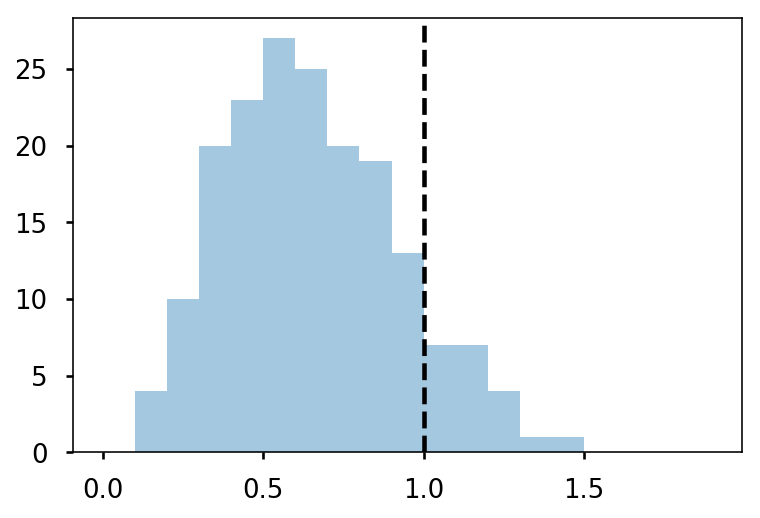

In [72]:
sns.distplot(vec[vec == vec], bins=np.arange(0,2, 0.1), kde=False)
plt.axvline(1.0, color='k', linestyle='dashed')

In [73]:
inclination = np.arcsin(vec)*180.0/np.pi

/Users/obsidian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.


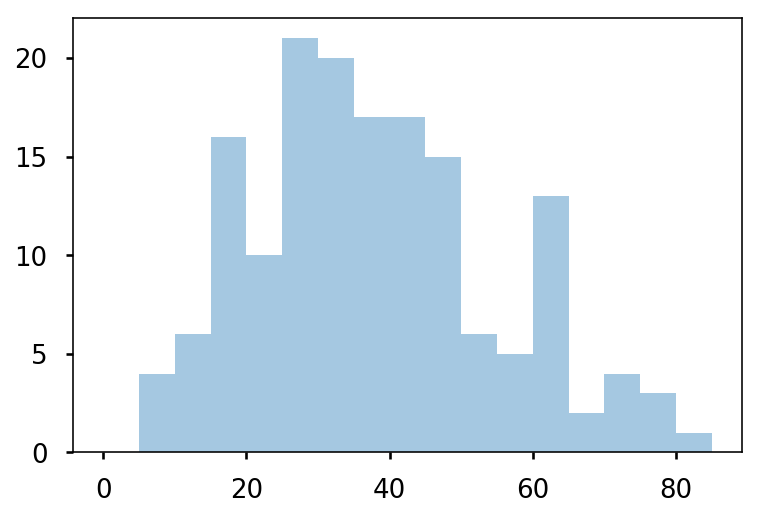

In [74]:
sns.distplot(inclination[inclination == inclination], bins=np.arange(0,90.0, 5), kde=False);

In [75]:
fang_K2['sini'] = vec

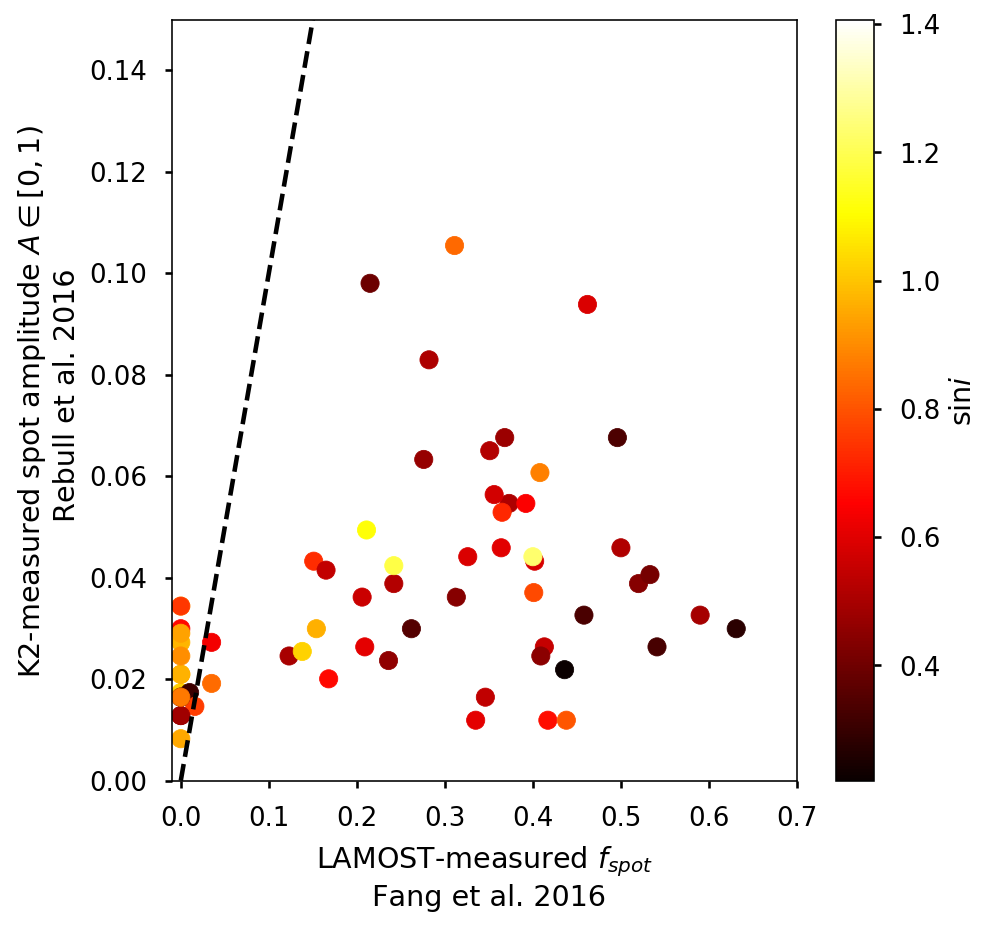

In [76]:
plt.figure(figsize=(7, 7))
cross_tab = 'sini'
cm = plt.cm.get_cmap('hot')
sc = plt.scatter(fang_K2.fs1, fang_K2.flux_amp, c=fang_K2[cross_tab], cmap=cm)
cb = plt.colorbar(sc)
cb.set_label(r'$\sin{i}$')

plt.plot([0,1], [0,1], 'k--')
plt.xlim(-0.01,0.7)
plt.ylim(0,0.15)
plt.xlabel('LAMOST-measured $f_{spot}$ \n Fang et al. 2016')
plt.ylabel('K2-measured spot amplitude $A \in [0,1)$ \n Rebull et al. 2016')
#plt.xticks(np.arange(0, 0.51, 0.1))
#plt.yticks(np.arange(0, 0.51, 0.1))
plt.savefig('K2_LAMOST_starspots_cb.png', bbox_inches='tight', dpi=300);